# Задача кластеризации

## Импорт необходимых библиотек

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Генерация датасетов

### make_classification

In [15]:
X_class, y_class = make_classification(
    n_samples=900, 
    n_features=4, 
    n_classes=3, 
    n_clusters_per_class=1, 
    n_informative=4, 
    n_redundant=0, 
    random_state=42
)

Сохранение датасета

In [16]:
df_class = pd.DataFrame(X_class, columns=[f'feature_{i}' for i in range(X_class.shape[1])])
df_class.to_csv('classification_dataset.csv', index=False)

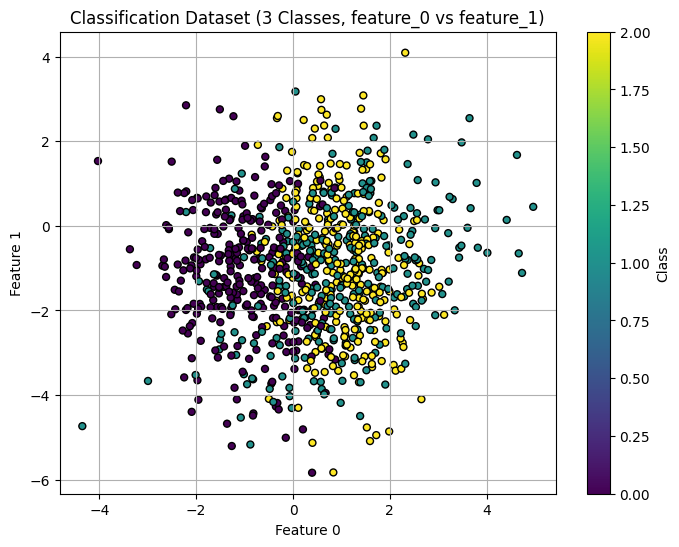

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df_class['feature_0'], df_class['feature_1'], marker="o", c=y_class, s=25, edgecolor="k", cmap='viridis')
plt.title('Classification Dataset (3 Classes, feature_0 vs feature_1)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [18]:
X_blobs, y_blobs = make_blobs(
    n_samples=1000, 
    n_features=4, 
    centers=4, 
    cluster_std=1.0, 
    random_state=42
)

In [19]:
df_blobs = pd.DataFrame(X_blobs, columns=[f'feature_{i}' for i in range(X_blobs.shape[1])])
df_blobs.to_csv('blobs_dataset.csv', index=False)

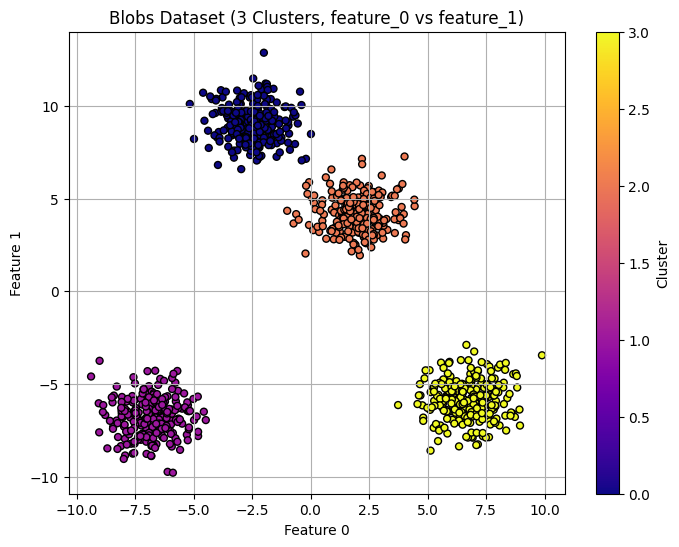

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df_blobs['feature_0'], df_blobs['feature_1'], marker="o", c=y_blobs, s=25, edgecolor="k", cmap='plasma')
plt.title('Blobs Dataset (3 Clusters, feature_0 vs feature_1)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [21]:
data_classifier = pd.read_csv('csgo_filtred.csv')
data_classifier = data_classifier.sample(frac=0.1, random_state=42)  # например, 30% от исходных данных

# Далее разделите на X и y
X_cl = data_classifier.drop(columns=['bomb_planted'], axis=1)
y_cl = data_classifier['bomb_planted']
X_cl['map'] = X_cl['map'].str.strip().str.lower()
mapping = {
    'de_inferno': 1,
    'de_dust2': 2,
    'de_nuke': 3,
    'de_mirage': 4,
    'de_overpass': 5,
    'de_train': 6,
    'de_vertigo': 7,
    'unknown': 8,
    'de_cache': 9
}

X_cl['map'] = X_cl['map'].map(mapping)
X_cl.shape, y_cl.shape

((11663, 20), (11663,))

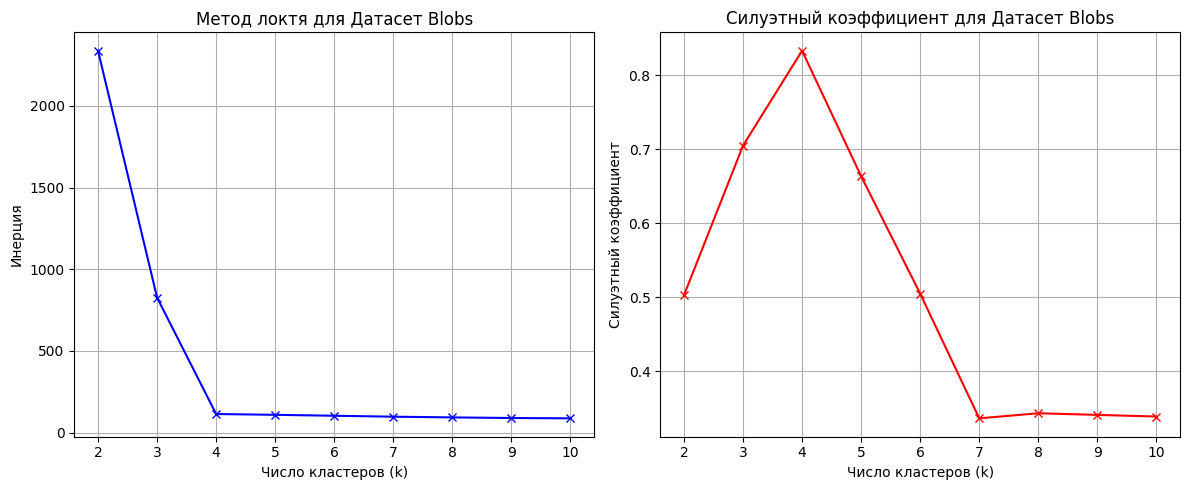

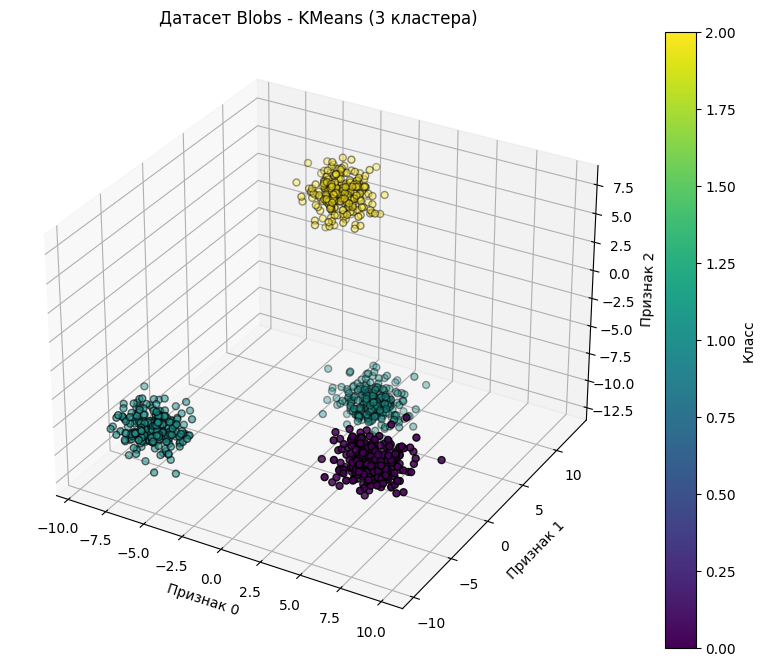

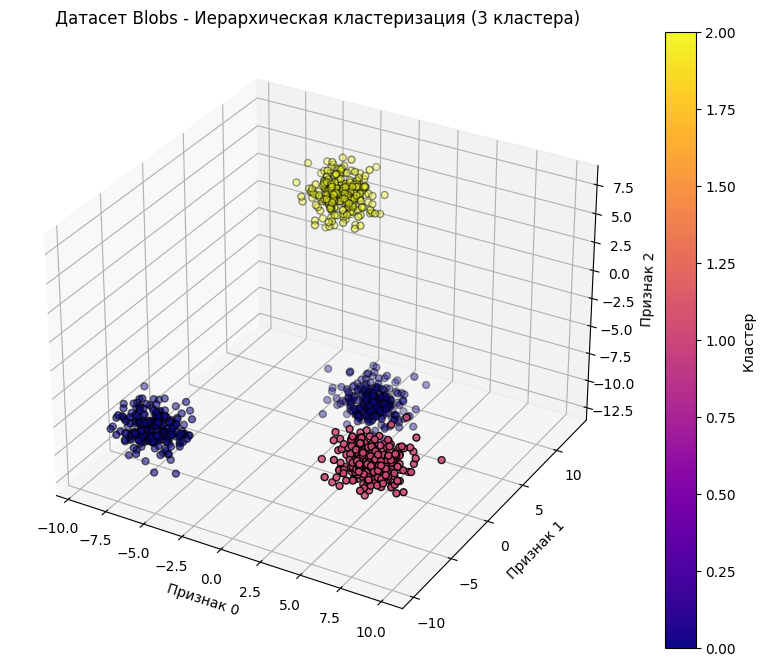

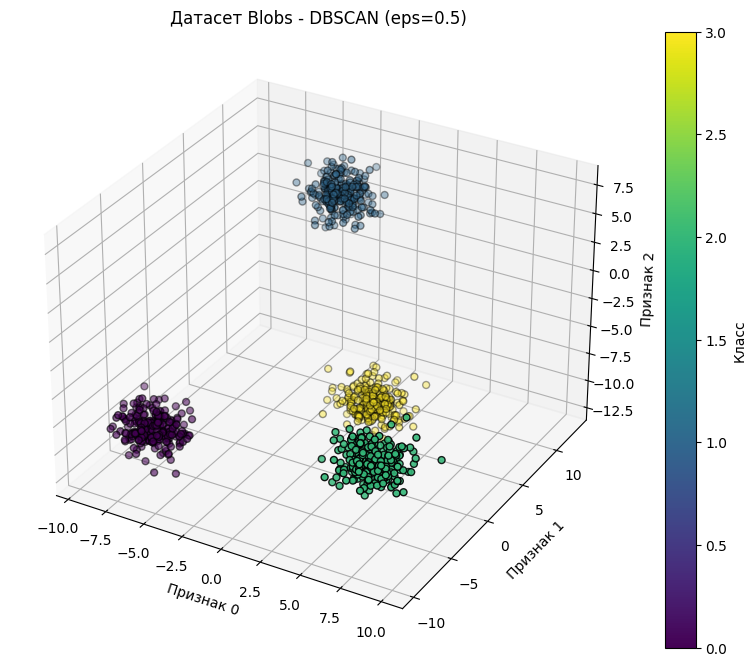

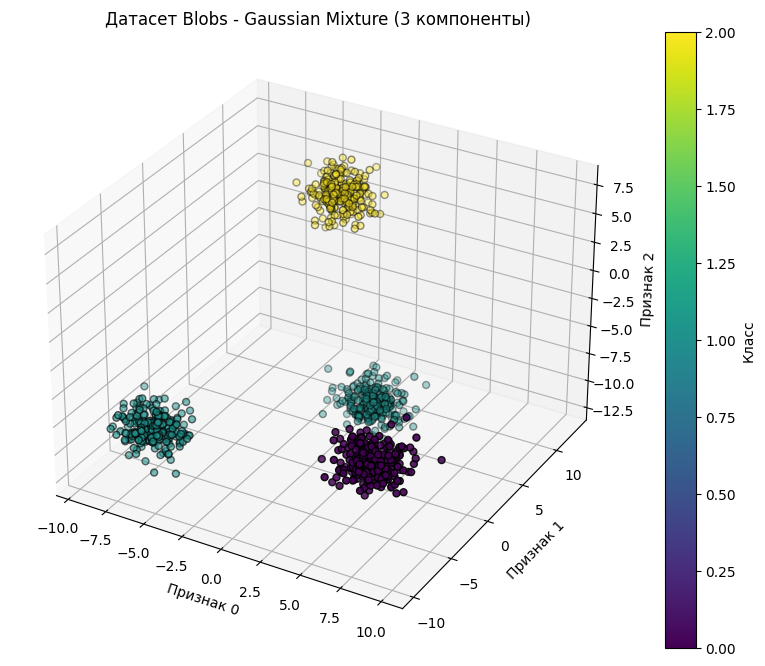

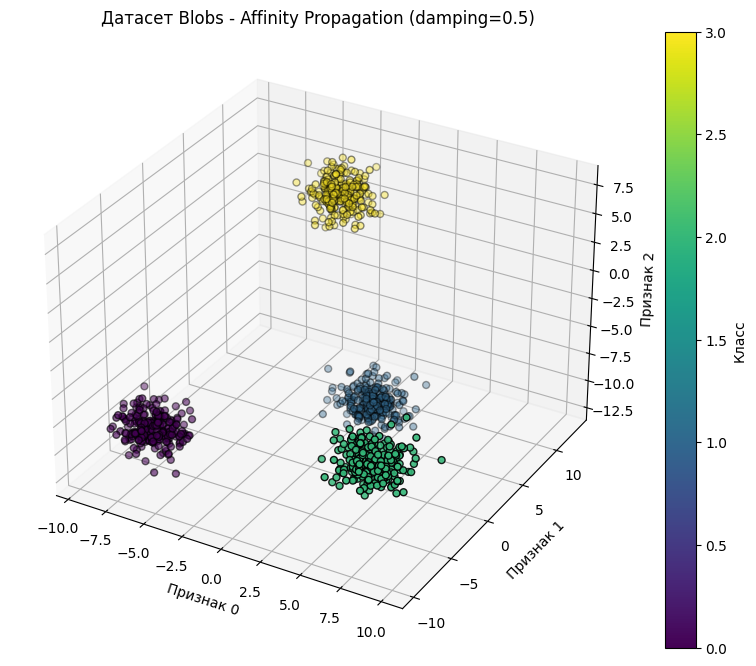

Инерция Custom K-Means для Датасет Blobs: 2409.608355813575


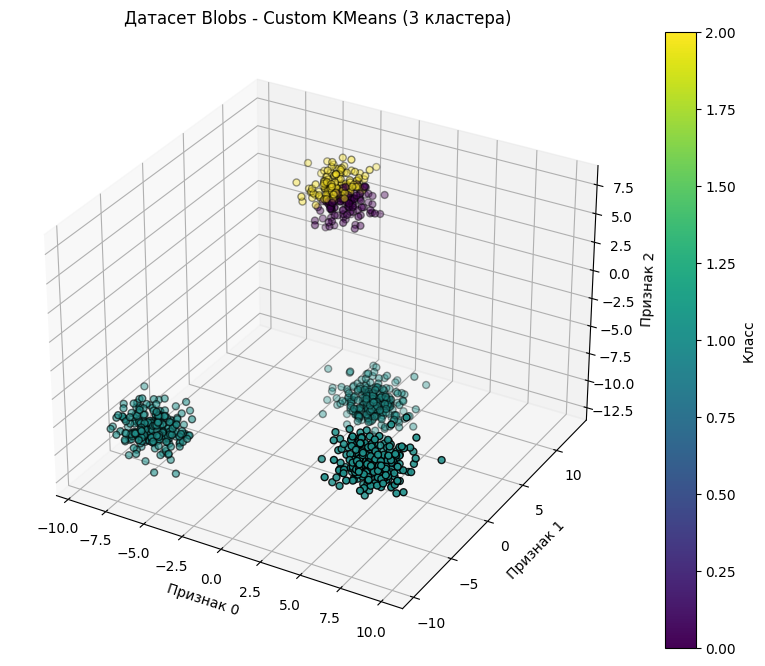

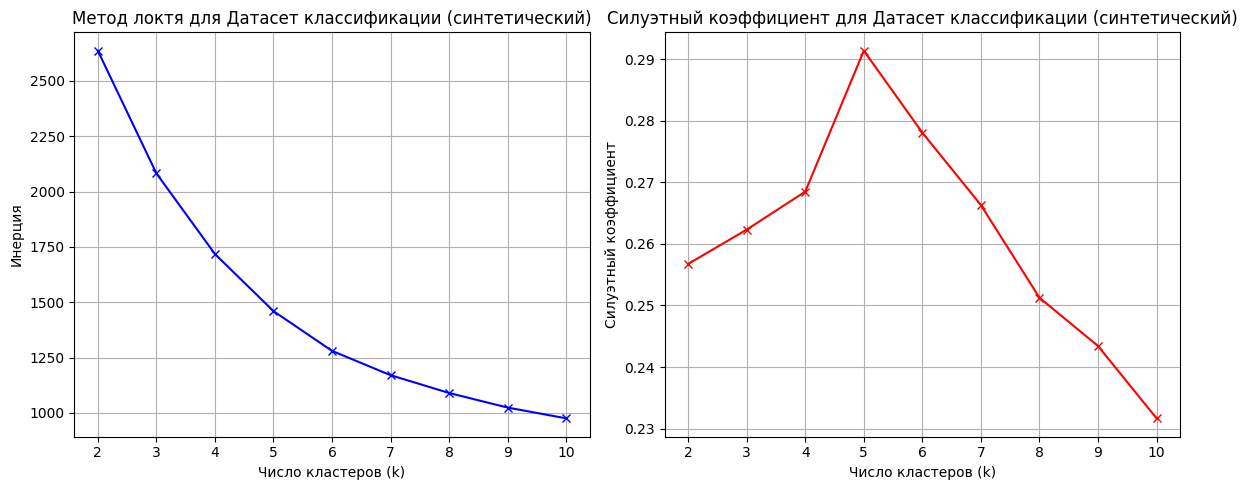

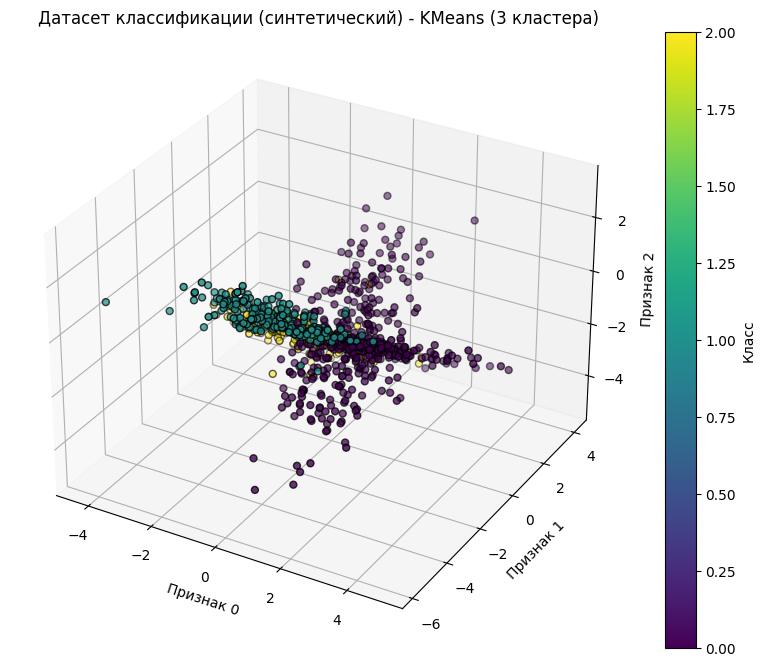

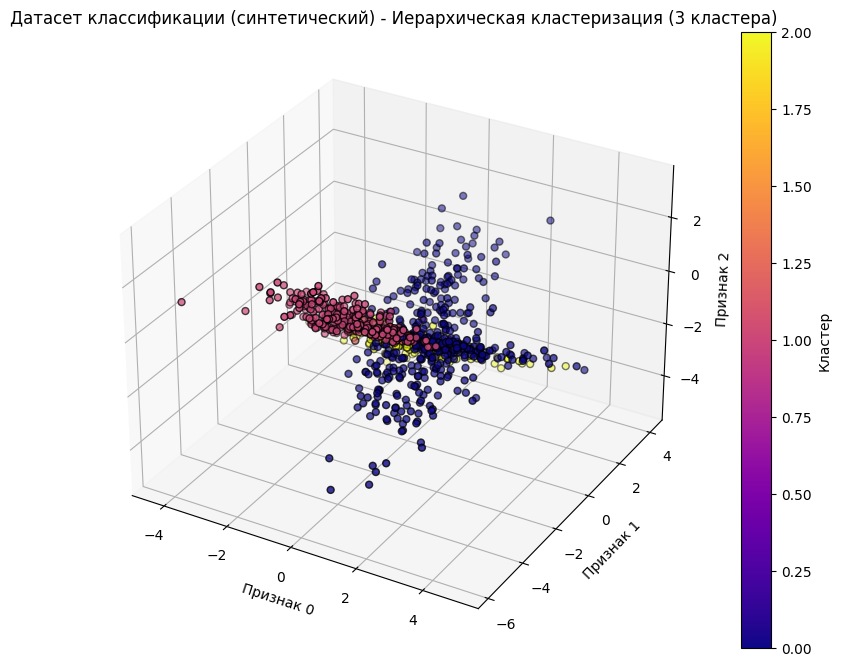

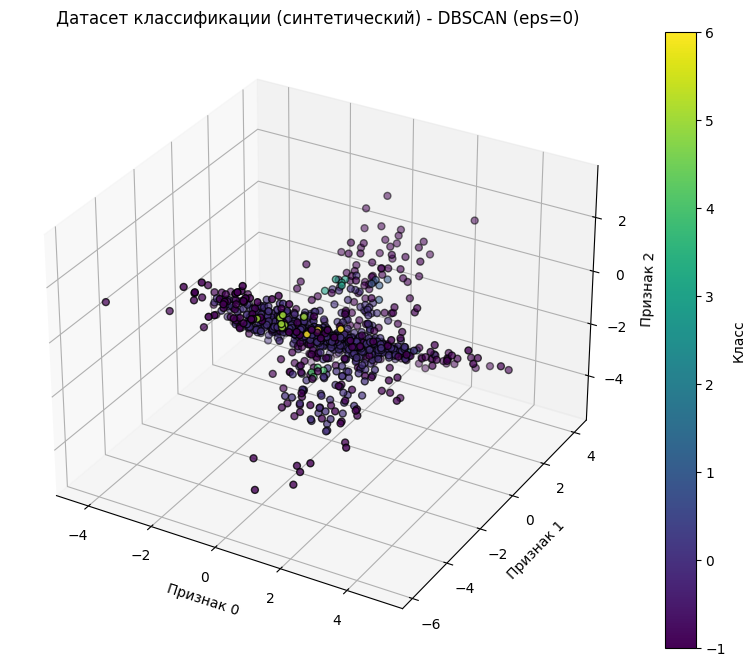

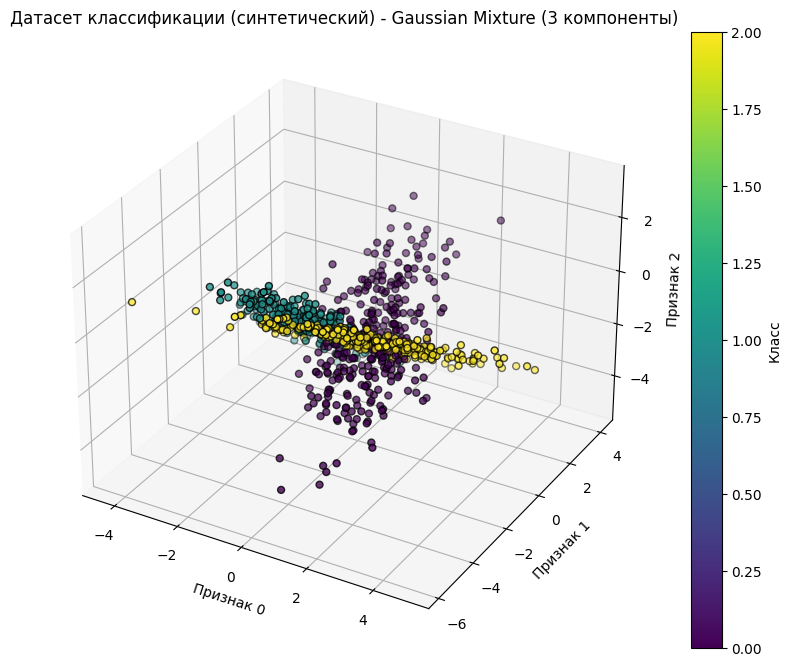

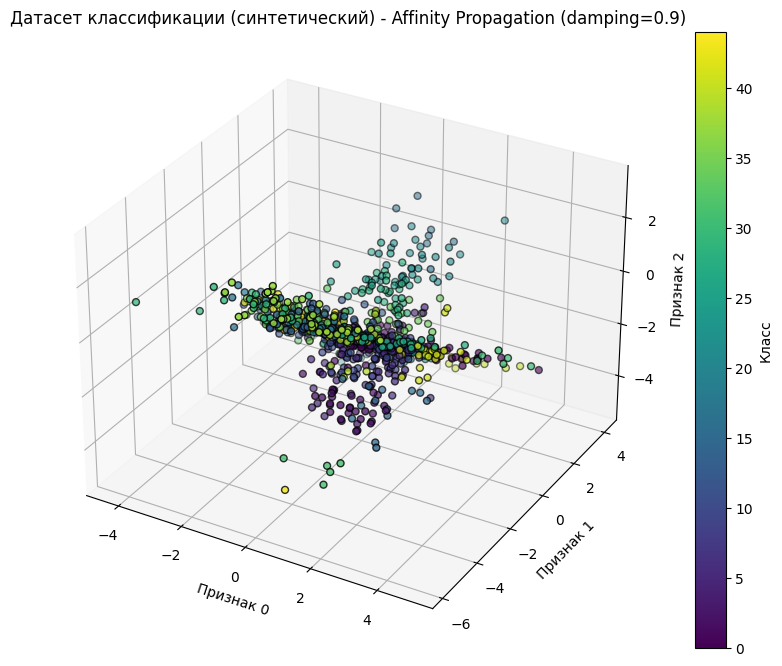

Инерция Custom K-Means для Датасет классификации (синтетический): 2082.132010479155


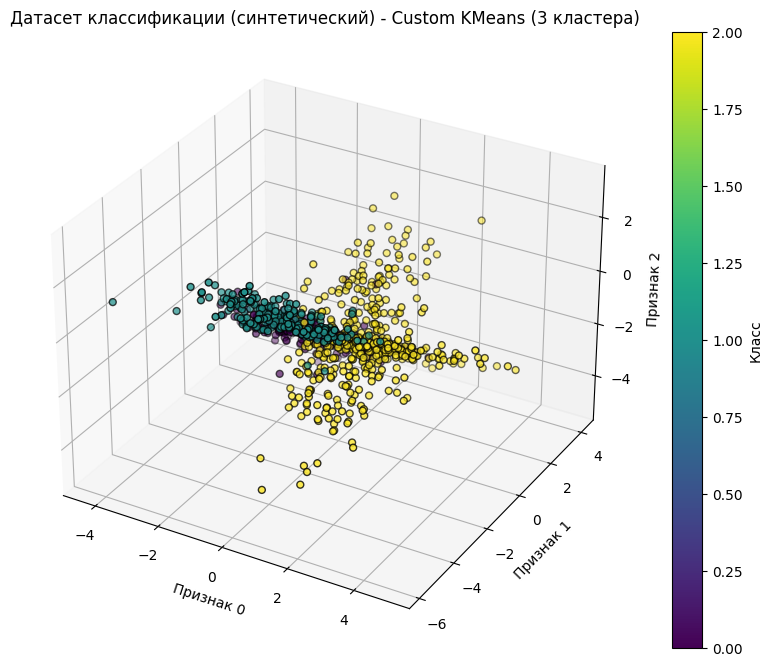

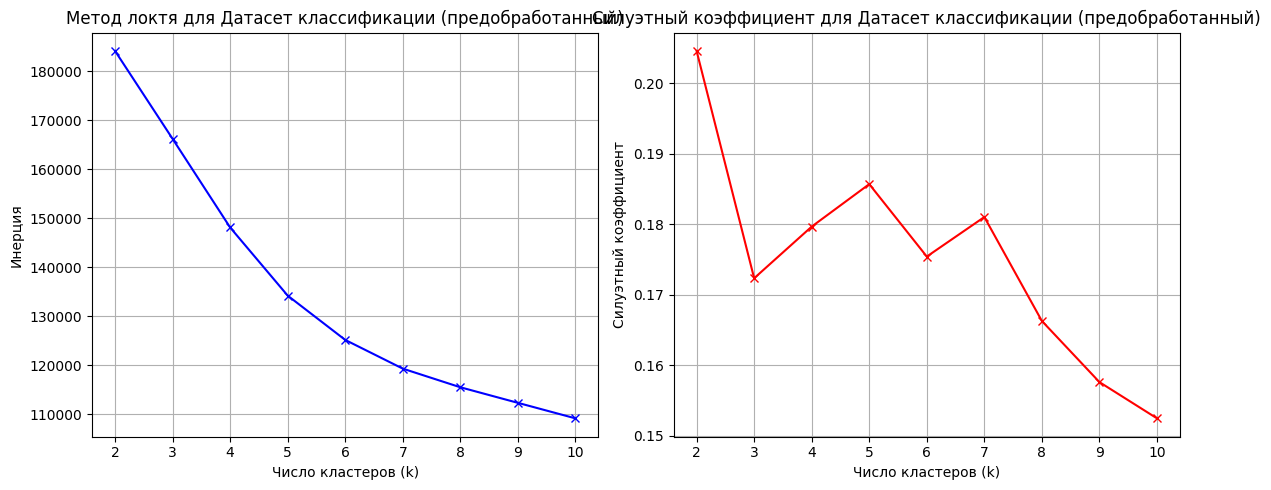

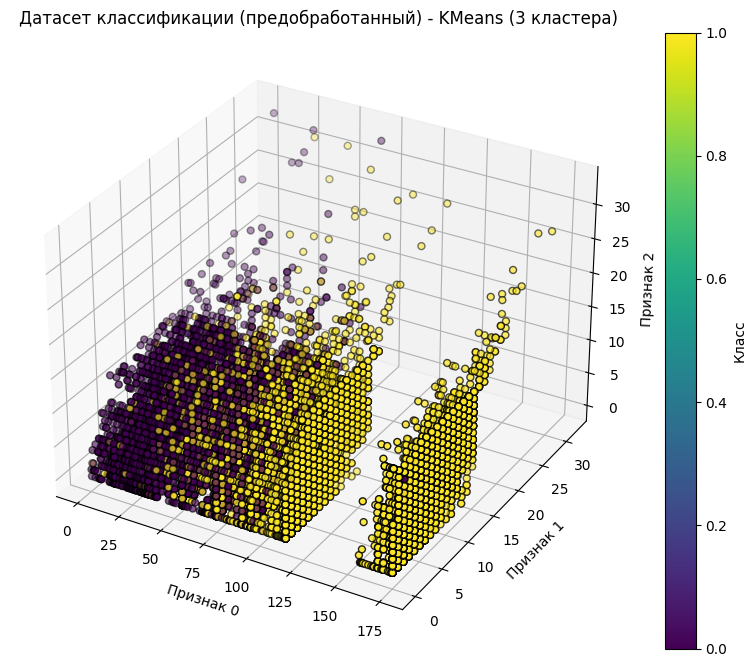

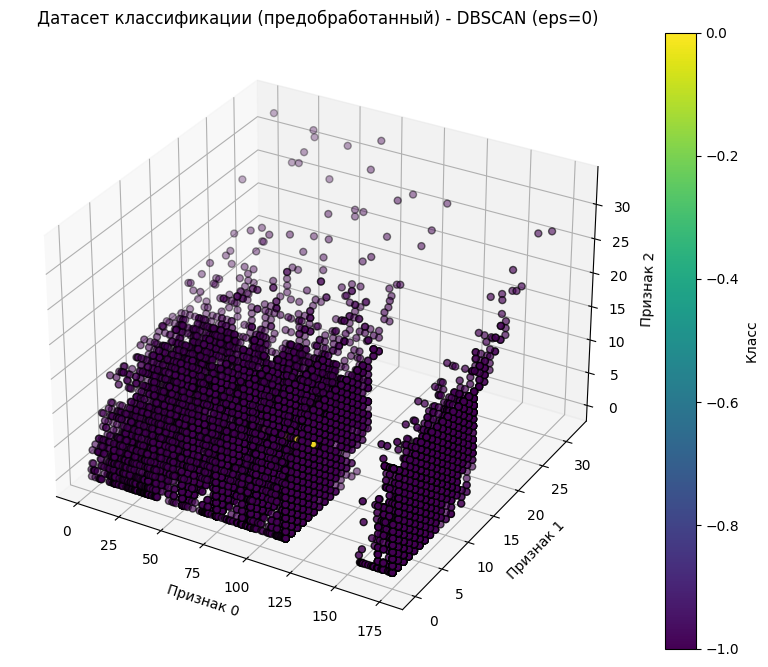

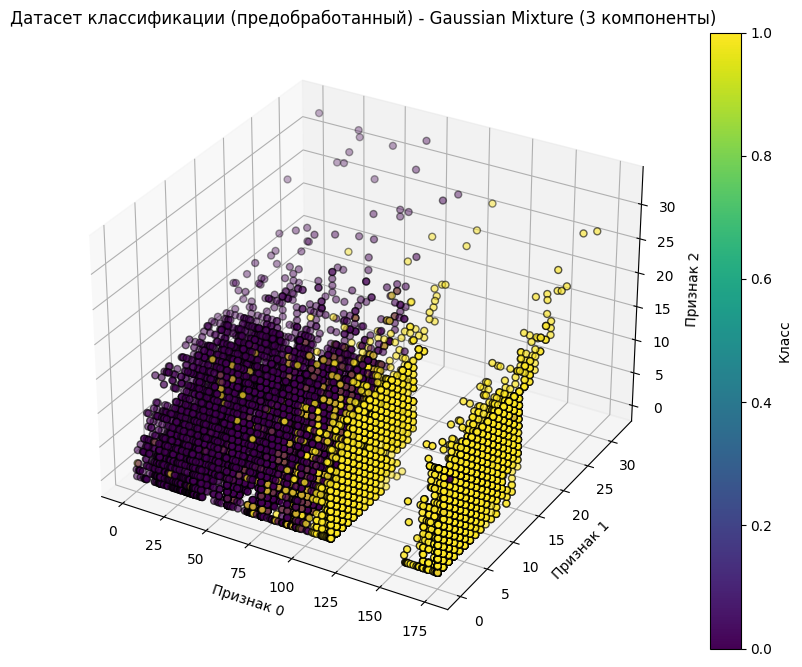

Инерция Custom K-Means для Датасет классификации (предобработанный): 184107.80512676493


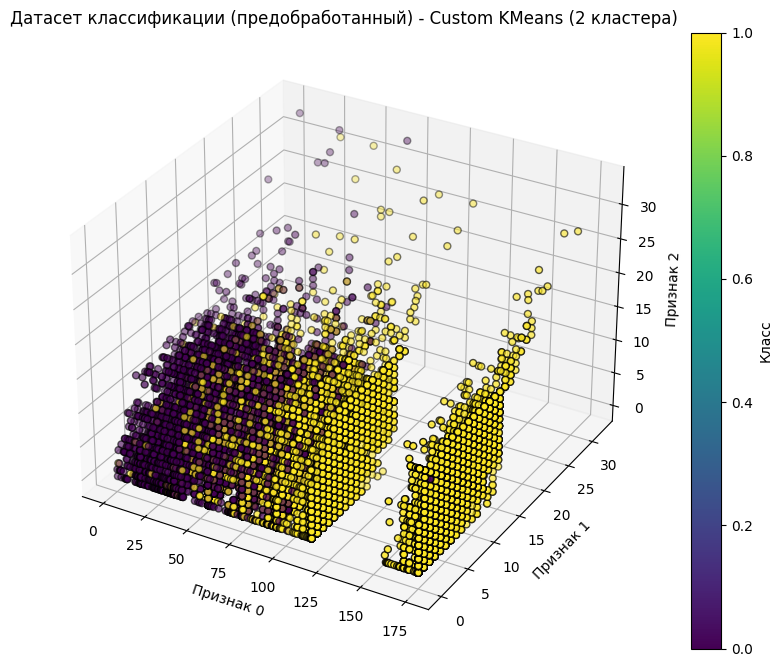


Характеристики кластеров для KMeans (Датасет классификации - предобработанный):
               time_left                                                       \
                   count        mean        std   min    25%      50%     75%   
KMeans_Cluster                                                                  
0                 4296.0   45.520398  26.276182  0.05  25.18   36.755   69.95   
1                 7367.0  121.628883  44.271071  0.20  93.50  114.910  174.91   

                      ct_score            ... helmets_lead       \
                  max    count      mean  ...          75%  max   
KMeans_Cluster                            ...                     
0               175.0   4296.0  6.597067  ...          1.0  2.0   
1               175.0   7367.0  6.926700  ...          1.0  2.0   

               players_alive_lead                                               
                            count      mean       std  min  25%  50%  75%  max  
KMeans_Cluster 

In [27]:
import pandas as pd
import numpy as np
from custom_k_means import CustomKMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Установка seed для воспроизводимости
np.random.seed(42)

# Чтение синтетических датасетов
df_class = pd.read_csv('classification_dataset.csv')
df_blobs = pd.read_csv('blobs_dataset.csv')

# Стандартизация данных
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(df_class)
X_blobs_scaled = scaler.fit_transform(df_blobs)
X_cl_scaled = scaler.fit_transform(X_cl)

# Функция для метода локтя и графика силуэтов
def plot_elbow_and_silhouette(X, dataset_name, max_k=10):
    inertias = []
    silhouettes = []
    K = range(2, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, kmeans.labels_))
    
    # График метода локтя
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Число кластеров (k)')
    plt.ylabel('Инерция')
    plt.title(f'Метод локтя для {dataset_name}')
    plt.grid(True)
    
    # График силуэтов
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouettes, 'rx-')
    plt.xlabel('Число кластеров (k)')
    plt.ylabel('Силуэтный коэффициент')
    plt.title(f'Силуэтный коэффициент для {dataset_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Визуализация кластеров в 3D
def plot_clusters(X, labels, title, true_labels=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    if true_labels is not None:
        scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker="o", c=labels, s=25, edgecolor="k", cmap='viridis')
    else:
        scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker="o", c=labels, s=25, edgecolor="k", cmap='plasma')
    ax.set_title(title)
    ax.set_xlabel('Признак 0')
    ax.set_ylabel('Признак 1')
    ax.set_zlabel('Признак 2')
    plt.colorbar(scatter, label='Кластер' if true_labels is None else 'Класс')
    plt.show()

# Подбор гиперпараметров и кластеризация
def apply_clustering(X, X_scaled, dataset_name, true_labels=None, is_classification=False, n_cluster=3):
    results = {}
    
    # 1. KMeans
    plot_elbow_and_silhouette(X_scaled, dataset_name)
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    results['KMeans'] = kmeans_labels
    plot_clusters(X, kmeans_labels, f'{dataset_name} - KMeans (3 кластера)', true_labels)
    
    # 2. Иерархическая кластеризация (только если is_classification=False)
    if not is_classification:
        agg = AgglomerativeClustering(n_clusters=n_cluster)
        agg_labels = agg.fit_predict(X_scaled)
        results['Agglomerative'] = agg_labels
        plot_clusters(X, agg_labels, f'{dataset_name} - Иерархическая кластеризация (3 кластера)')
    
    # 3. DBSCAN
    eps_values = [0.3, 0.5, 0.7]
    best_eps, best_silhouette = 0, -1
    best_dbscan_labels = None
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(X_scaled)
        if len(np.unique(labels)) > 1 and -1 not in np.unique(labels):
            score = silhouette_score(X_scaled, labels)
            if score > best_silhouette:
                best_silhouette = score
                best_eps = eps
                best_dbscan_labels = labels
    if best_dbscan_labels is None:
        best_dbscan_labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_scaled)
    results['DBSCAN'] = best_dbscan_labels
    plot_clusters(X, best_dbscan_labels, f'{dataset_name} - DBSCAN (eps={best_eps})', true_labels)
    
    # 4. Gaussian Mixture (EM-алгоритм)
    gm = GaussianMixture(n_components=n_cluster, random_state=42)
    gm_labels = gm.fit_predict(X_scaled)
    results['GaussianMixture'] = gm_labels
    plot_clusters(X, gm_labels, f'{dataset_name} - Gaussian Mixture (3 компоненты)', true_labels)
    
    # 5. Affinity Propagation
    if not is_classification:
        damping_values = [0.5, 0.7, 0.9]
        best_damping, best_silhouette = 0, -1
        best_ap_labels = None
        for damping in damping_values:
            ap = AffinityPropagation(damping=damping, random_state=42)
            labels = ap.fit_predict(X_scaled)
            if len(np.unique(labels)) > 1:
                score = silhouette_score(X_scaled, labels)
                if score > best_silhouette:
                    best_silhouette = score
                    best_damping = damping
                    best_ap_labels = labels
        results['AffinityPropagation'] = best_ap_labels
        plot_clusters(X, best_ap_labels, f'{dataset_name} - Affinity Propagation (damping={best_damping})', true_labels)

    # 6. CustomKMeans
    custom_kmeans = CustomKMeans(n_clusters=n_cluster, random_state=42)
    custom_kmeans_labels = custom_kmeans.fit_predict(X_scaled)
    results['CustomKMeans'] = custom_kmeans_labels
    print(f"Инерция Custom K-Means для {dataset_name}: {custom_kmeans.inertia_}")
    plot_clusters(X, custom_kmeans_labels, f'{dataset_name} - Custom KMeans ({n_cluster} кластера)', true_labels)
    
    return results

# Применение кластеризации
# Пункт 1: Все алгоритмы для blobs_dataset
blobs_results = apply_clustering(df_blobs.values, X_blobs_scaled, 'Датасет Blobs', y_blobs, is_classification=False)

# Пункт 1: Все алгоритмы для classification_dataset
class_results = apply_clustering(df_class.values, X_class_scaled, 'Датасет классификации (синтетический)', y_class, is_classification=False)

# Пункт 2: Только KMeans, DBSCAN, GaussianMixture, AffinityPropagation для X_cl
cl_results = apply_clustering(X_cl.values, X_cl_scaled, 'Датасет классификации (предобработанный)', y_cl, is_classification=True, n_cluster=2)

# Добавление номеров кластеров и характеристик для X_cl
df_cl_clusters = X_cl.copy()
for algo, labels in cl_results.items():
    df_cl_clusters[f'{algo}_Cluster'] = labels
    print(f"\nХарактеристики кластеров для {algo} (Датасет классификации - предобработанный):")
    print(df_cl_clusters.groupby(f'{algo}_Cluster').describe())

# Сохранение обновленного датасета
df_cl_clusters.to_csv('cl_dataset_with_clusters.csv', index=False)

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, davies_bouldin_score

# Функция для оценки качества кластеризации
def evaluate_clustering(X_scaled, labels, true_labels, algo_name, dataset_name):
    results = {}
    
    # Внешние метрики (требуют истинных меток)
    if true_labels is not None:
        results['ARI'] = adjusted_rand_score(true_labels, labels)
        results['NMI'] = normalized_mutual_info_score(true_labels, labels)
    
    # Внутренние метрики
    if len(np.unique(labels)) > 1 and -1 not in np.unique(labels):  # Проверка на валидность кластеров
        results['Silhouette'] = silhouette_score(X_scaled, labels)
        results['Davies-Bouldin'] = davies_bouldin_score(X_scaled, labels)
    else:
        results['Silhouette'] = 'N/A (недостаточно кластеров или шум)'
        results['Davies-Bouldin'] = 'N/A (недостаточно кластеров или шум)'
    
    print(f"\nОценка {algo_name} для {dataset_name}:")
    for metric, value in results.items():
        print(f"{metric}: {value}")
    return results

# Оценка для blobs_dataset
print("\n=== Оценка для blobs_dataset ===")
for algo, labels in blobs_results.items():
    evaluate_clustering(X_blobs_scaled, labels, y_blobs, algo, 'blobs_dataset')

# Оценка для classification_dataset
print("\n=== Оценка для classification_dataset ===")
for algo, labels in class_results.items():
    evaluate_clustering(X_class_scaled, labels, y_class, algo, 'classification_dataset')

# Оценка для X_cl
print("\n=== Оценка для X_cl ===")
for algo, labels in cl_results.items():
    evaluate_clustering(X_cl_scaled, labels, y_cl, algo, 'X_cl')

In [ ]:
from custom_k_means import CustomKMeans

